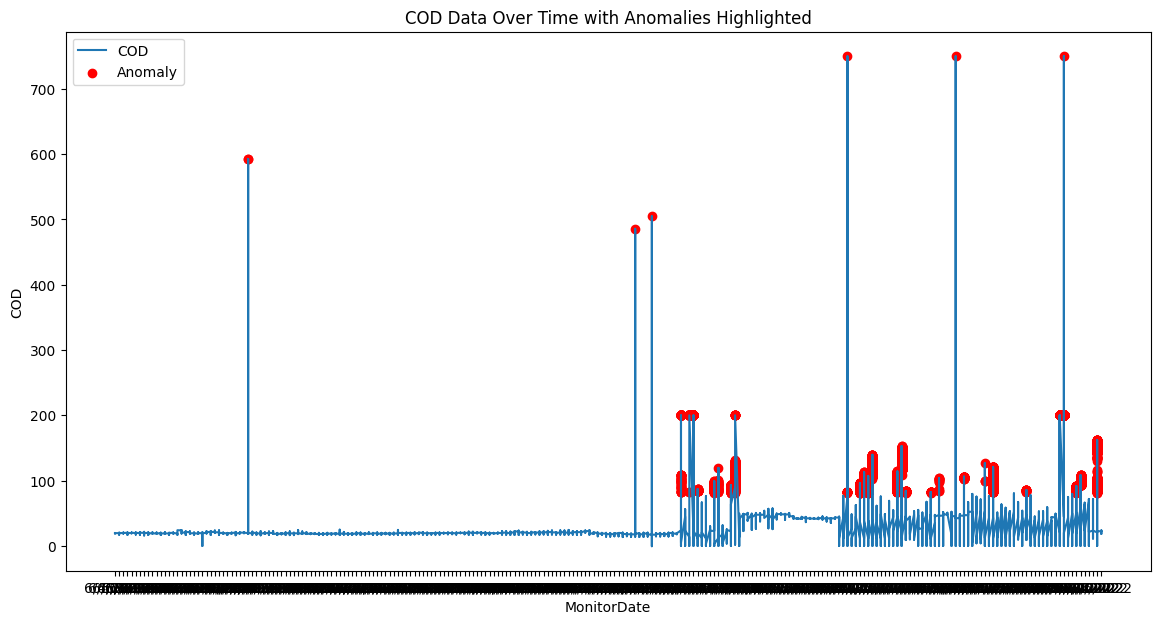

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

file_path = "../../../data/zone_temparature_and_humidity.csv"
# Load your dataset
data_csv = pd.read_csv(file_path)

# Select the specific feature for analysis
feature = 'payload_Zone1_humidity_mt0708_dew_value'
data_feature = data_csv[feature].dropna().values.reshape(-1, 1)
column_timestamp= "timeStamp"
# Apply the Isolation Forest method
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(data_feature)
anomaly_indices = np.where(anomalies == -1)[0]

# Plot the data with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(data_csv[column_timestamp], data_csv[feature], label=feature)
plt.scatter(data_csv.iloc[anomaly_indices][column_timestamp], data_csv.iloc[anomaly_indices][feature], color='red', label='Anomaly')
plt.xlabel(column_timestamp)
plt.ylabel(feature)
plt.title(f'{feature} Data Over Time with Anomalies Highlighted')
plt.legend()
plt.show()